<a href="https://colab.research.google.com/github/Carvas91/ML_algorithms_practice/blob/main/KNN_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from sklearn import set_config
set_config(transform_output='pandas')

In [5]:
sacramento = pd.read_csv('https://raw.githubusercontent.com/UofT-DSI/LCR/refs/heads/main/01_materials/notebooks/dataset/sacramento.csv')
sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,1 KENNELFORD CIR,SACRAMENTO,95823,CA,3,2,1144,Residential,Mon May 19 00:00:00 EDT 2008,200345,38.464520,-121.427606
1,10 SEA FOAM CT,SACRAMENTO,95831,CA,3,3,2052,Residential,Wed May 21 00:00:00 EDT 2008,415000,38.487885,-121.545947
2,100 CHELSEA CT,FOLSOM,95630,CA,3,2,1905,Residential,Mon May 19 00:00:00 EDT 2008,500000,38.694350,-121.177259
3,100 REBECCA WAY,FOLSOM,95630,CA,3,2,2185,Residential,Wed May 21 00:00:00 EDT 2008,344250,38.684790,-121.149199
4,100 TOURMALINE CIR,SACRAMENTO,95834,CA,5,3,3076,Residential,Mon May 19 00:00:00 EDT 2008,240000,38.634370,-121.510779
...,...,...,...,...,...,...,...,...,...,...,...,...
809,9880 IZILDA CT,SACRAMENTO,95829,CA,5,4,3863,Residential,Fri May 16 00:00:00 EDT 2008,598695,38.453260,-121.325730
810,993 MANTON CT,GALT,95632,CA,4,3,2307,Residential,Tue May 20 00:00:00 EDT 2008,300000,38.272942,-121.289148
811,9937 BURLINE ST,SACRAMENTO,95827,CA,3,2,1092,Residential,Fri May 16 00:00:00 EDT 2008,150000,38.559641,-121.323160
812,9949 NESTLING CIR,ELK GROVE,95757,CA,3,2,1543,Residential,Fri May 16 00:00:00 EDT 2008,275000,38.397455,-121.468391


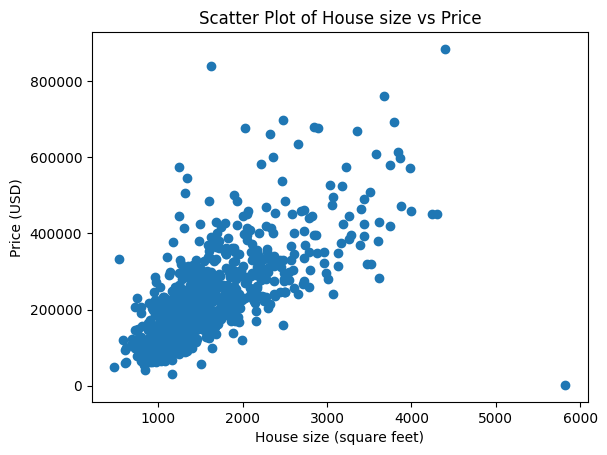

In [6]:
# Plot
plt.scatter(sacramento["sq__ft"], sacramento['price'])

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House size vs Price')
plt.show()

In [8]:
np.random.seed(123)

small_sacramento = sacramento.sample(30)
small_sacramento.head(5)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
185,2610 PHYLLIS AVE,SACRAMENTO,95820,CA,2,1,804,Residential,Mon May 19 00:00:00 EDT 2008,120000,38.531050,-121.479574
210,294 SPARROW DR,GALT,95632,CA,4,3,2214,Residential,Fri May 16 00:00:00 EDT 2008,278000,38.258976,-121.321266
487,6000 BIRCHGLADE WAY,CITRUS HEIGHTS,95621,CA,4,2,1351,Residential,Mon May 19 00:00:00 EDT 2008,158000,38.701660,-121.323249
267,361 MAHONIA CIR,SACRAMENTO,95835,CA,4,3,2175,Residential,Mon May 19 00:00:00 EDT 2008,261000,38.676172,-121.509761
674,8164 CHENIN BLANC LN,FAIR OAKS,95628,CA,2,2,1315,Residential,Tue May 20 00:00:00 EDT 2008,230000,38.665644,-121.259969


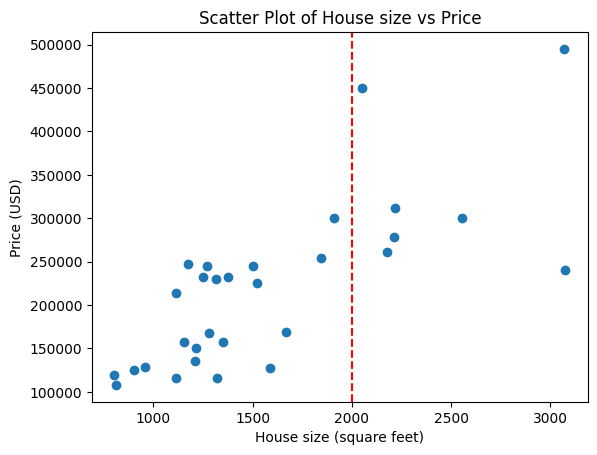

In [9]:
# Plot
plt.scatter(small_sacramento["sq__ft"], small_sacramento['price'])

# Add a vertical line at 2,000 square feet
plt.axvline(x=2000, color='red', linestyle='--', label='2000 sqft')

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House size vs Price')

plt.show()

In [13]:
small_sacramento['dist'] = (2000 - small_sacramento['sq__ft']).abs()
small_sacramento['dist'].head(5)

,dist
185,1196
210,214
487,649
267,175
674,685


In [14]:
nearest_neighbors = small_sacramento.nsmallest(5, 'dist')
nearest_neighbors

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,dist
227,3108 DELWOOD WAY,SACRAMENTO,95821,CA,4,2,2053,Residential,Fri May 16 00:00:00 EDT 2008,450000,38.621566,-121.370882,53
456,5651 OVERLEAF WAY,SACRAMENTO,95835,CA,4,2,1910,Residential,Tue May 20 00:00:00 EDT 2008,300500,38.677454,-121.494791,90
388,4901 MILLNER WAY,ELK GROVE,95757,CA,3,2,1843,Residential,Wed May 21 00:00:00 EDT 2008,254200,38.386920,-121.447349,157
267,361 MAHONIA CIR,SACRAMENTO,95835,CA,4,3,2175,Residential,Mon May 19 00:00:00 EDT 2008,261000,38.676172,-121.509761,175
210,294 SPARROW DR,GALT,95632,CA,4,3,2214,Residential,Fri May 16 00:00:00 EDT 2008,278000,38.258976,-121.321266,214


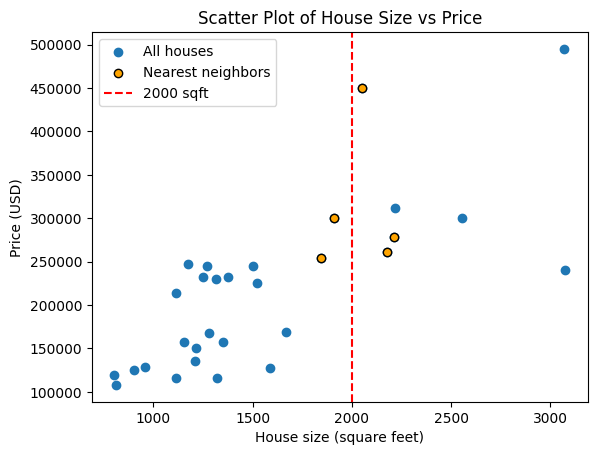

In [15]:
# Scatter plot
plt.scatter(small_sacramento["sq__ft"], small_sacramento['price'], label='All houses')

# Plot nearest neighbors in orange
plt.scatter(nearest_neighbors["sq__ft"], nearest_neighbors['price'], color='orange', label='Nearest neighbors', edgecolor='black')

# Add a vertical line at 2,000 square feet
plt.axvline(x=2000, color='red', linestyle='--', label='2000 sqft')

# Add labels, title, and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House Size vs Price')
plt.legend()

In [16]:
prediction = nearest_neighbors['price'].mean()
prediction

308740.0

In [17]:
sacramento_train, sacramento_test = train_test_split(sacramento, test_size=0.25, random_state=42)

In [18]:
X_train = sacramento_train[['sq__ft']]
y_train = sacramento_train['price']
X_test = sacramento_test[['sq__ft']]
y_test = sacramento_test['price']

In [19]:
knn_regression = KNeighborsRegressor()


In [20]:
#Param grid
param_grid = {
    'n_neighbors': range(1,201,2)
}

In [22]:
sacr_gridsearch = GridSearchCV(knn_regression,
                               param_grid,
                               cv=5,
                               scoring='neg_root_mean_squared_error')


In [23]:
sacr_gridsearch.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 201, 2)},
             scoring='neg_root_mean_squared_error')

In [24]:
results = pd.DataFrame(sacr_gridsearch.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003158,0.001386,0.002679,0.000322,1,{'n_neighbors': 1},-106989.667780,-114371.634727,-105175.565360,-123089.248725,-96546.303504,-109234.484019,8953.756395,100
1,0.002927,0.000309,0.003226,0.000212,3,{'n_neighbors': 3},-90831.207254,-86732.713770,-87971.668638,-108176.768197,-87159.020977,-92174.275767,8127.839581,99
2,0.002999,0.000248,0.003351,0.000277,5,{'n_neighbors': 5},-86240.116388,-83975.799180,-78624.286860,-102478.928593,-82555.879175,-86775.002040,8233.712458,66
3,0.002502,0.000284,0.002897,0.000494,7,{'n_neighbors': 7},-86349.868528,-82652.840634,-76381.841300,-101925.247202,-79996.337054,-85461.226943,8854.839872,54
4,0.002376,0.000451,0.003644,0.002373,9,{'n_neighbors': 9},-84472.877338,-81396.018167,-77632.605195,-102196.431149,-76769.136387,-84493.413647,9270.666222,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.002310,0.000150,0.005097,0.000133,191,{'n_neighbors': 191},-92963.603506,-89310.579429,-90489.446263,-102128.231921,-78131.665089,-90604.705242,7689.224214,94
96,0.002164,0.000084,0.004940,0.000101,193,{'n_neighbors': 193},-93005.404642,-89574.394573,-90579.801671,-102194.121691,-78176.188325,-90705.982180,7688.391759,95
97,0.002251,0.000044,0.005426,0.000563,195,{'n_neighbors': 195},-93126.361540,-89691.924098,-90701.508472,-102216.696606,-78272.948269,-90801.887797,7667.039317,96
98,0.002248,0.000072,0.005144,0.000095,197,{'n_neighbors': 197},-93279.095902,-89894.373370,-90743.814225,-102342.553591,-78485.914761,-90949.150370,7638.393057,97


In [25]:
results['mean_test_score'] = results['mean_test_score'].abs()
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003158,0.001386,0.002679,0.000322,1,{'n_neighbors': 1},-106989.667780,-114371.634727,-105175.565360,-123089.248725,-96546.303504,109234.484019,8953.756395,100
1,0.002927,0.000309,0.003226,0.000212,3,{'n_neighbors': 3},-90831.207254,-86732.713770,-87971.668638,-108176.768197,-87159.020977,92174.275767,8127.839581,99
2,0.002999,0.000248,0.003351,0.000277,5,{'n_neighbors': 5},-86240.116388,-83975.799180,-78624.286860,-102478.928593,-82555.879175,86775.002040,8233.712458,66
3,0.002502,0.000284,0.002897,0.000494,7,{'n_neighbors': 7},-86349.868528,-82652.840634,-76381.841300,-101925.247202,-79996.337054,85461.226943,8854.839872,54
4,0.002376,0.000451,0.003644,0.002373,9,{'n_neighbors': 9},-84472.877338,-81396.018167,-77632.605195,-102196.431149,-76769.136387,84493.413647,9270.666222,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.002310,0.000150,0.005097,0.000133,191,{'n_neighbors': 191},-92963.603506,-89310.579429,-90489.446263,-102128.231921,-78131.665089,90604.705242,7689.224214,94
96,0.002164,0.000084,0.004940,0.000101,193,{'n_neighbors': 193},-93005.404642,-89574.394573,-90579.801671,-102194.121691,-78176.188325,90705.982180,7688.391759,95
97,0.002251,0.000044,0.005426,0.000563,195,{'n_neighbors': 195},-93126.361540,-89691.924098,-90701.508472,-102216.696606,-78272.948269,90801.887797,7667.039317,96
98,0.002248,0.000072,0.005144,0.000095,197,{'n_neighbors': 197},-93279.095902,-89894.373370,-90743.814225,-102342.553591,-78485.914761,90949.150370,7638.393057,97


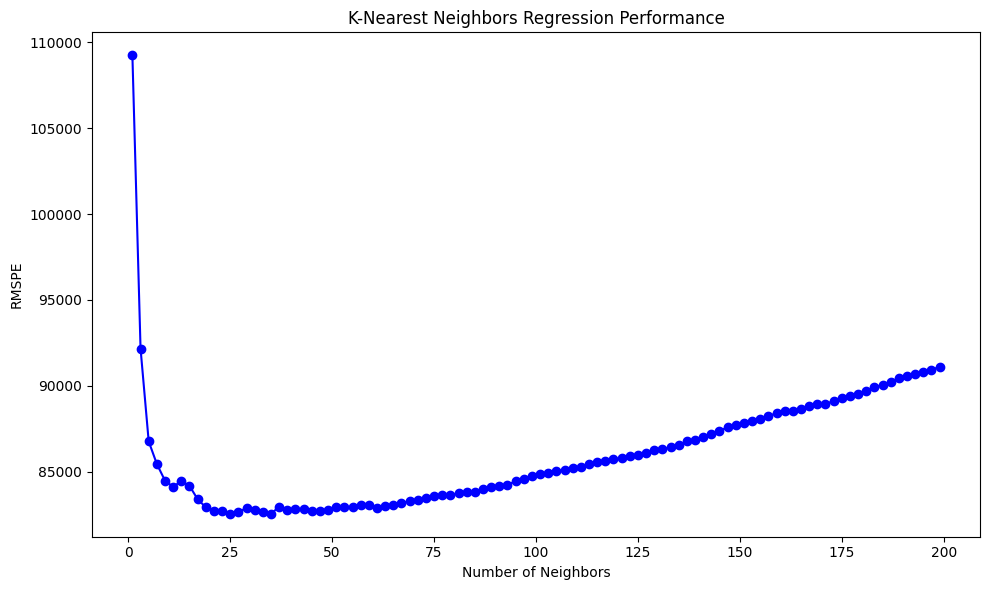

In [27]:
#Create the plot
plt.figure(figsize=(10, 6))

# Plot mean test scores with error bars
plt.plot(results['param_n_neighbors'], results['mean_test_score'], '-o', color='blue')

# Add labels and legend
plt.xlabel('Number of Neighbors')
plt.ylabel('RMSPE')
plt.title('K-Nearest Neighbors Regression Performance')
plt.tight_layout()
plt.show()

In [30]:
#The best K
sacr_gridsearch.best_params_['n_neighbors']

25

In [32]:
#R2 score
sacr_gridsearch2 = GridSearchCV(knn_regression,
                               param_grid,
                               cv=5,
                               scoring='r2')

In [33]:
sacr_gridsearch2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 201, 2)}, scoring='r2')

In [34]:
results_2 = pd.DataFrame(sacr_gridsearch2.cv_results_)
results_2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002600,0.000893,0.002652,0.000246,1,{'n_neighbors': 1},0.192079,0.054404,0.226816,-0.026939,0.194868,0.128246,0.097739,100
1,0.003064,0.000961,0.003081,0.000416,3,{'n_neighbors': 3},0.417688,0.456206,0.459073,0.206818,0.343824,0.376722,0.094580,99
2,0.002159,0.000036,0.002593,0.000190,5,{'n_neighbors': 5},0.475067,0.490227,0.567918,0.288174,0.411303,0.446538,0.093569,69
3,0.002702,0.001085,0.002794,0.000407,7,{'n_neighbors': 7},0.473730,0.506162,0.592213,0.295845,0.447241,0.463038,0.096812,57
4,0.003588,0.000766,0.004465,0.000112,9,{'n_neighbors': 9},0.496360,0.521067,0.578748,0.292093,0.490940,0.475842,0.097003,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.002373,0.000203,0.005473,0.000161,191,{'n_neighbors': 191},0.390026,0.423400,0.427667,0.293038,0.472710,0.401368,0.060218,94
96,0.002179,0.000053,0.005269,0.000128,193,{'n_neighbors': 193},0.389477,0.419989,0.426523,0.292125,0.472109,0.400045,0.060084,95
97,0.002159,0.000021,0.005273,0.000067,195,{'n_neighbors': 195},0.387888,0.418465,0.424981,0.291812,0.470801,0.398790,0.059702,96
98,0.002206,0.000064,0.006410,0.002200,197,{'n_neighbors': 197},0.385879,0.415837,0.424444,0.290067,0.467917,0.396829,0.059490,97


In [35]:
sacr_gridsearch2.best_params_['n_neighbors']

25

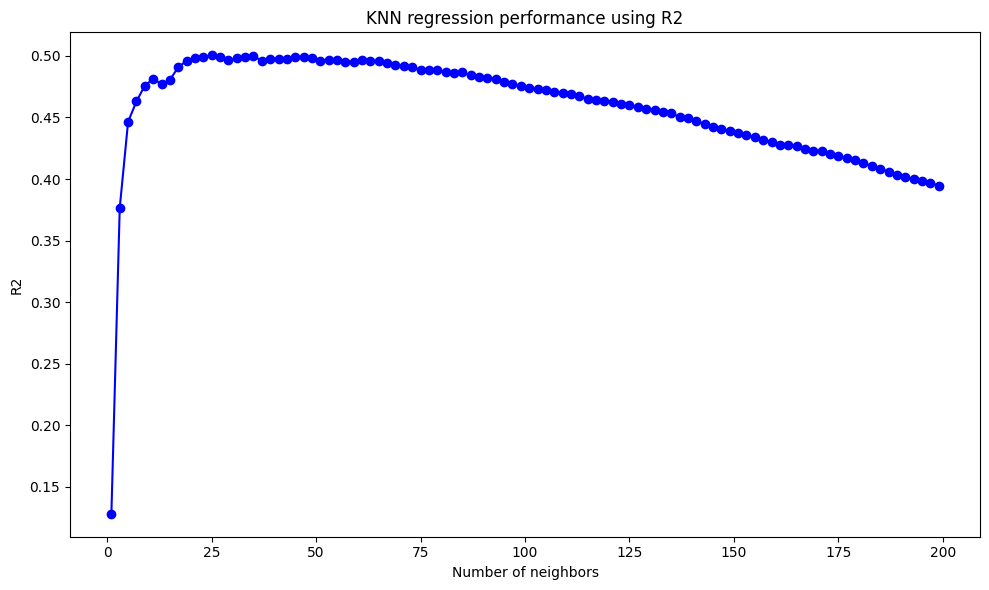

In [40]:
plt.figure(figsize =(10,6))
plt.plot(results_2['param_n_neighbors'], results_2['mean_test_score'],
         '-o', color = "blue")

#add labels and legends
plt.xlabel("Number of neighbors")
plt.ylabel("R2")
plt.title("KNN regression performance using R2")
plt.tight_layout()
plt.show()

In [42]:
sacramento_test['predicted'] = sacr_gridsearch.predict(X_test)
#RMSE
rmse = mean_squared_error(sacramento_test['price'], sacramento_test['predicted'])**0.5
rmse

93541.04174900812

In [43]:
#R2

r2 = r2_score(sacramento_test['price'], sacramento_test['predicted'])
r2

0.4519245345852605

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


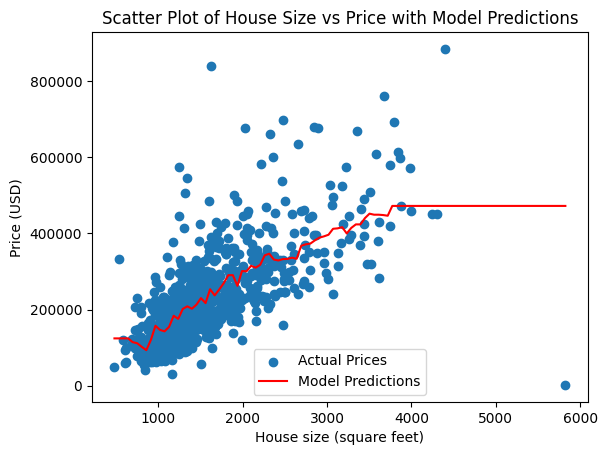

In [44]:
sizes = np.linspace(sacramento["sq__ft"].min(), sacramento["sq__ft"].max(), 100).reshape(-1, 1)

# Predict house prices for these sizes using the best model from GridSearchCV
predicted_prices = sacr_gridsearch.predict(sizes)

# Plot the original data
plt.scatter(sacramento["sq__ft"], sacramento["price"], label="Actual Prices")

# Plot the model predictions as a line
plt.plot(sizes, predicted_prices, color='red', label="Model Predictions")

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel("Price (USD)")
plt.title("Scatter Plot of House Size vs Price with Model Predictions")
plt.legend()
plt.show();